### **Classification of football news using transformers (DistillBERT)**

*   EDA + data cleaning
*   Tokenization
*   visualization with unsupervised learning (PCA) and DistillBERT as Features extractor  
*   Training
*   EA (Error Analysis)






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import plotly.express as px

In [2]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
pip install transformers skimpy

In [12]:
from skimpy import skim
import re
import emoji

# **EDA + data cleaning**

In [ ]:
df_fake = pd.read_csv("/content/drive/MyDrive/Kaggle/fake_foot/fake.csv")

In [ ]:
df_real = pd.read_csv("/content/drive/MyDrive/Kaggle/fake_foot/real.csv")

In [ ]:
df_fake.head()

,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...


In [ ]:
df_real.head()

,tweet
0,sun downs technical director: al-ahly respecte...
1,shawky gharib after the tie with enppi: our go...
2,"egyptian sports news today, wednesday 1/25/202..."
3,the main referees committee of the egyptian fo...
4,"haji bari, the striker of the future team, is ..."


In [ ]:
df_fake["label"] = 0
df_real["label"] = 1

In [ ]:
df_fake.head()

,tweet,label
0,"the tongue of his condition, now i saw things ...",0
1,"by god the great, after i saw the derby of wyd...",0
2,"believe in god, this zamalek fans are as good ...",0
3,the coach appeared in the media and told the t...,0
4,asno smito\nwhoever knows her tells me a massa...,0


In [ ]:
df_real.head()

,tweet,label
0,sun downs technical director: al-ahly respecte...,1
1,shawky gharib after the tie with enppi: our go...,1
2,"egyptian sports news today, wednesday 1/25/202...",1
3,the main referees committee of the egyptian fo...,1
4,"haji bari, the striker of the future team, is ...",1


In [ ]:
df = pd.concat([df_real, df_fake], join = "inner")

In [ ]:
seed = 42

In [ ]:
df = df.sample(frac=1, random_state=seed)

In [ ]:
df

,tweet,label
18220,they say the plumber bizzy plays these balls t...,0
4556,"mostafa abdel raouf ""zico"", the player of hara...",1
18593,a loss due to ancelotti\nsame mistakes every g...,0
16055,fathallah zidane reveals the egyptian duo who ...,1
16658,"al-ahly board of directors meeting today, frid...",1
...,...,...
6265,alaa ezzat: managing al-ahly is a privilege wi...,1
11284,"the smouha team, led by ahmed sami, returns to...",1
16289,"ouch, they entered this ball, haha, if you cam...",0
860,tariq mustafa: the absence of tariq hamed grea...,1


In [ ]:
skim(df)

╭─────────────────────────────── skimpy summary ───────────────────────────────╮
│          Data Summary                Data Types                              │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                       │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                       │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                       │
│ │ Number of rows    │ 41868  │ │ string      │ 1     │                       │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                       │
│ └───────────────────┴────────┘ └─────────────┴───────┘                       │
│                                   number                                     │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA % ┃ mean ┃ sd  ┃ p0 ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ label        │   0 │    

In [ ]:
df[df['tweet'].isna()]

,tweet,label
6404,NaN,1
9644,NaN,0
18084,NaN,1
7232,NaN,0
5400,NaN,0
17002,NaN,0
9046,NaN,0
17823,NaN,1
10104,NaN,1
11185,NaN,0


In [ ]:
df.isna().sum()

tweet    17
label     0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True)

,tweet,label
0,they say the plumber bizzy plays these balls t...,0
1,"mostafa abdel raouf ""zico"", the player of hara...",1
2,a loss due to ancelotti\nsame mistakes every g...,0
3,fathallah zidane reveals the egyptian duo who ...,1
4,"al-ahly board of directors meeting today, frid...",1
...,...,...
41846,alaa ezzat: managing al-ahly is a privilege wi...,1
41847,"the smouha team, led by ahmed sami, returns to...",1
41848,"ouch, they entered this ball, haha, if you cam...",0
41849,tariq mustafa: the absence of tariq hamed grea...,1


In [ ]:
def cleaning(text):

  text = emoji.demojize(text)
  text = re.sub(r'\:(.*?)\:','',text)
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
  return text

In [ ]:
df["tweet"] = df["tweet"].apply(cleaning)

In [ ]:
df

,tweet,label
18220,they say the plumber bizzy plays these balls t...,0
4556,"mostafa abdel raouf zico , the player of haras...",1
18593,a loss due to ancelottisame mistakes every gam...,0
16055,fathallah zidane reveals the egyptian duo who ...,1
16658,"al ahly board of directors meeting today, frid...",1
...,...,...
6265,alaa ezzat managing al ahly is a privilege wit...,1
11284,"the smouha team, led by ahmed sami, returns to...",1
16289,"ouch, they entered this ball, haha, if you cam...",0
860,tariq mustafa the absence of tariq hamed great...,1


In [ ]:
df.query("tweet != ''", inplace=True)
df

,tweet,label
18220,they say the plumber bizzy plays these balls t...,0
4556,"mostafa abdel raouf zico , the player of haras...",1
18593,a loss due to ancelottisame mistakes every gam...,0
16055,fathallah zidane reveals the egyptian duo who ...,1
16658,"al ahly board of directors meeting today, frid...",1
...,...,...
6265,alaa ezzat managing al ahly is a privilege wit...,1
11284,"the smouha team, led by ahmed sami, returns to...",1
16289,"ouch, they entered this ball, haha, if you cam...",0
860,tariq mustafa the absence of tariq hamed great...,1


In [ ]:
df.reset_index(drop=True, inplace=True)
df

,tweet,label
0,they say the plumber bizzy plays these balls t...,0
1,"mostafa abdel raouf zico , the player of haras...",1
2,a loss due to ancelottisame mistakes every gam...,0
3,fathallah zidane reveals the egyptian duo who ...,1
4,"al ahly board of directors meeting today, frid...",1
...,...,...
41846,alaa ezzat managing al ahly is a privilege wit...,1
41847,"the smouha team, led by ahmed sami, returns to...",1
41848,"ouch, they entered this ball, haha, if you cam...",0
41849,tariq mustafa the absence of tariq hamed great...,1


In [ ]:
from collections import Counter

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def collect_word(text):
  words = text.split()
  words_without_stopwords = [w for w in words if w not in stop_words]
  text = " ".join(words_without_stopwords).strip()
  return text

In [ ]:
df["words"] = df["tweet"].apply(collect_word)

In [ ]:
df

,tweet,label,words
0,they say the plumber bizzy plays these balls t...,0,say plumber bizzy plays balls tomorrowtell two...
1,"mostafa abdel raouf zico , the player of haras...",1,"mostafa abdel raouf zico , player haras el hod..."
2,a loss due to ancelottisame mistakes every gam...,0,loss due ancelottisame mistakes every gameand ...
3,fathallah zidane reveals the egyptian duo who ...,1,fathallah zidane reveals egyptian duo close jo...
4,"al ahly board of directors meeting today, frid...",1,"al ahly board directors meeting today, friday,..."
...,...,...,...
41846,alaa ezzat managing al ahly is a privilege wit...,1,alaa ezzat managing al ahly privilege honors a...
41847,"the smouha team, led by ahmed sami, returns to...",1,"smouha team, led ahmed sami, returns training ..."
41848,"ouch, they entered this ball, haha, if you cam...",0,"ouch, entered ball, haha, came girls, guarante..."
41849,tariq mustafa the absence of tariq hamed great...,1,tariq mustafa absence tariq hamed greatly affe...


In [ ]:
def plot_most_common(df, n=10,label=None):
  if label is None:
    counter = Counter(" ".join(df["words"]).strip().split())
    index = "all dataset"
  else:
    counter = Counter(" ".join(df[df.label == label]["words"]).strip().split())
    index = "fake news" if label == 0 else "real news"

  word, count = zip(*counter.most_common(n))
  plt.barh(word, count)
  plt.title(f"Most commons word for {index}")
  plt.xticks(rotation = 45)
  plt.show()

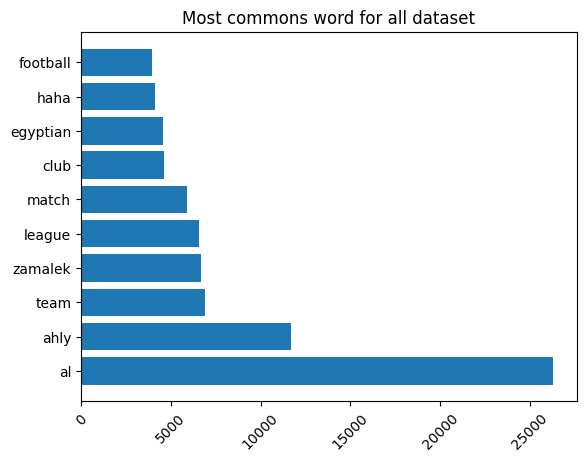

In [ ]:
plot_most_common(df)

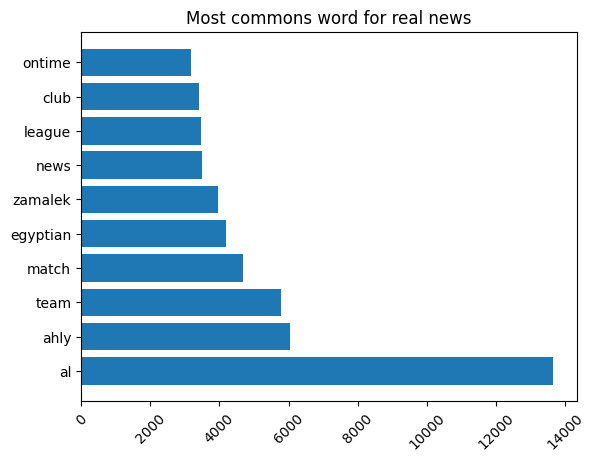

In [ ]:
plot_most_common(df, label=1)

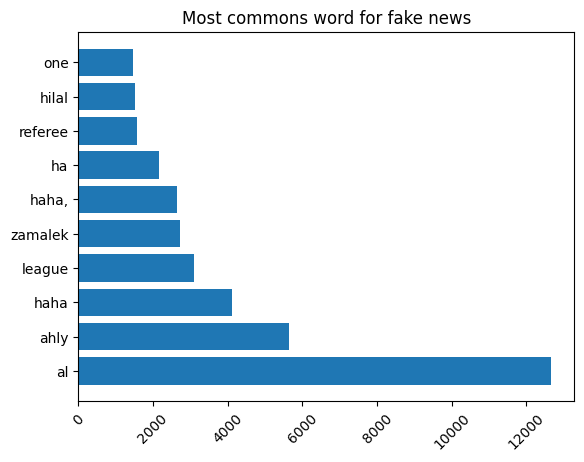

In [ ]:
plot_most_common(df, label=0)

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_word_cloud(df, label=None):
  if label is None:
    text = " ".join(df["words"]).strip()
    index = "all dataset"
  else:
    text = " ".join(df[df.label==label]["words"]).strip()
    index = "fake news" if label==0 else "real news"
  wordcloud = WordCloud(max_words=500).generate(text)
  plt.imshow(wordcloud)
  plt.title(f"Wordcloud for {index}")
  plt.show()

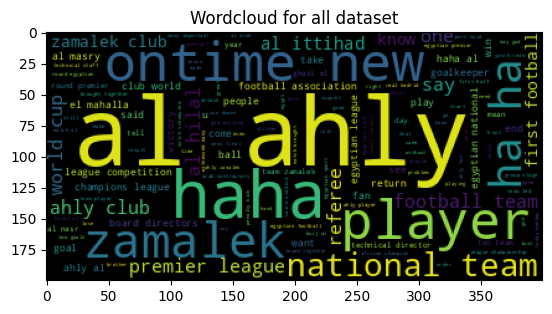

In [ ]:
plot_word_cloud(df)

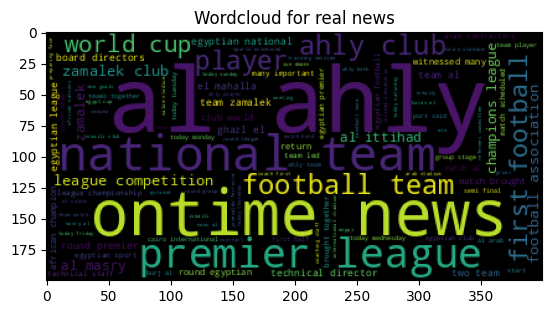

In [ ]:
plot_word_cloud(df, label=1)

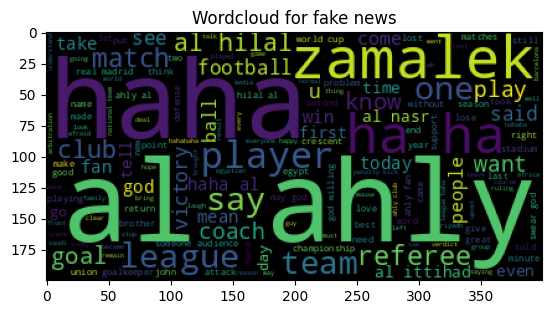

In [ ]:
plot_word_cloud(df, label=0)

In [ ]:
def input_len(text):
  length = len(text.split())
  return length

In [ ]:
df["len"] = df["tweet"].apply(input_len)

In [ ]:
df

,tweet,label,words,len
0,they say the plumber bizzy plays these balls t...,0,say plumber bizzy plays balls tomorrowtell two...,38
1,"mostafa abdel raouf zico , the player of haras...",1,"mostafa abdel raouf zico , player haras el hod...",46
2,a loss due to ancelottisame mistakes every gam...,0,loss due ancelottisame mistakes every gameand ...,67
3,fathallah zidane reveals the egyptian duo who ...,1,fathallah zidane reveals egyptian duo close jo...,27
4,"al ahly board of directors meeting today, frid...",1,"al ahly board directors meeting today, friday,...",9
...,...,...,...,...
41846,alaa ezzat managing al ahly is a privilege wit...,1,alaa ezzat managing al ahly privilege honors a...,15
41847,"the smouha team, led by ahmed sami, returns to...",1,"smouha team, led ahmed sami, returns training ...",23
41848,"ouch, they entered this ball, haha, if you cam...",0,"ouch, entered ball, haha, came girls, guarante...",16
41849,tariq mustafa the absence of tariq hamed great...,1,tariq mustafa absence tariq hamed greatly affe...,24


In [ ]:
 px.box(df, x="label", y="len")

In [ ]:
df = df[['tweet', 'label']]

In [ ]:
df.head()

,tweet,label
0,they say the plumber bizzy plays these balls t...,0
1,"mostafa abdel raouf zico , the player of haras...",1
2,a loss due to ancelottisame mistakes every gam...,0
3,fathallah zidane reveals the egyptian duo who ...,1
4,"al ahly board of directors meeting today, frid...",1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(df, random_state=seed, test_size=0.2)

# **TRAIN TEST VALIDATION SPLIT**

In [ ]:
train_data, val_data = train_test_split(train_data, random_state=seed, test_size=0.2)

In [ ]:
train_data.reset_index(drop=True, inplace=True)
train_data

,tweet,label
0,i tell you qatar's plans say let's let face mo...,0
1,"we are sorry, saberby god almighty, we are diz...",0
2,sundowns defense is very beautiful haha,0
3,"haha, salem, may god forgive jesus the day he ...",0
4,"al ittihad fans, i swear to god, i will come, ...",0
...,...,...
26779,amr el dardir the league championship between ...,1
26780,hassoun wants to make amends between the two t...,0
26781,cameroonian legends eto'o and milla support th...,1
26782,from cameroon learn about the most prominent a...,1


In [ ]:
test_data.reset_index(drop=True, inplace=True)
test_data

,tweet,label
0,al ahly prepares the attacking quartet.. and c...,1
1,"in the case of matrit, they would answer the ...",0
2,the match against al tayaran and al qanat in t...,1
3,"ghanaian samson dean, chairman of the african ...",1
4,"walid ali, the attacking midfielder at pharco ...",1
...,...,...
8366,those who don't like football are deprived,0
8367,i talk the most and bark my voice on all these...,1
8368,al ahly closes smouha's page after the goalles...,1
8369,"nasr al ahly.yaannasis yaaho, the marsel, he ...",0


In [ ]:
val_data.reset_index(drop=True, inplace=True)
val_data

,tweet,label
0,minutes have passed since the ghazl el mahall...,1
1,fathallah zidane reveals the latest developmen...,1
2,"al hani suleiman, the goalkeeper of the smouha...",1
3,"minutes, we watch football, haha",0
4,the egyptian club began its preparations for t...,1
...,...,...
6691,the karate federation achieved many achievemen...,1
6692,"marcel kohler, the al ahly coach, revealed the...",1
6693,"today, friday, the fifth round of the premier ...",1
6694,o halilkm o haqin kouraconspiracies and shouti...,0


In [ ]:
train_data["label"].value_counts()

1    13872
0    12912
Name: label, dtype: int64

In [ ]:
test_data["label"].value_counts()

1    4456
0    3915
Name: label, dtype: int64

In [ ]:
val_data["label"].value_counts()

1    3535
0    3161
Name: label, dtype: int64

In [ ]:
train_data.to_csv("/content/drive/MyDrive/Kaggle/fake_foot/train.csv")
test_data.to_csv("/content/drive/MyDrive/Kaggle/fake_foot/test.csv")
val_data.to_csv("/content/drive/MyDrive/Kaggle/fake_foot/validation.csv")

In [4]:
pip install datasets --upgrade

In [1]:
from datasets import load_dataset, DatasetDict

In [2]:
dataset = DatasetDict({
    "train" : load_dataset("csv", data_files="/content/drive/MyDrive/Kaggle/fake_foot/train.csv")["train"],
    "test" : load_dataset("csv", data_files="/content/drive/MyDrive/Kaggle/fake_foot/test.csv")["train"],
    "validation" : load_dataset("csv", data_files="/content/drive/MyDrive/Kaggle/fake_foot/validation.csv")["train"],
})

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'tweet', 'label'],
        num_rows: 26784
    })
    test: Dataset({
        features: ['Unnamed: 0', 'tweet', 'label'],
        num_rows: 8371
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'tweet', 'label'],
        num_rows: 6696
    })
})

In [4]:
dataset = dataset.map((lambda x:
            {"tweet" : x["tweet"],
            "label" : x["label"]}), remove_columns=['Unnamed: 0'])

# **TOKENIZATION**

In [5]:
from transformers import AutoTokenizer, AutoModel
from transformers import AutoModelForSequenceClassification

In [6]:
model_name = "distilbert-base-uncased"

In [7]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [8]:
num_labels = len(set(dataset["train"]["label"]))
num_labels

2

In [9]:
import torch

In [10]:
from sklearn.metrics import accuracy_score, f1_score

In [11]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds)
  acc = accuracy_score(labels, preds)
  return {"accuracy" : acc,
          "f1" : f1}

In [12]:
def tokenize(batch):
  return tokenizer(batch['tweet'], padding=True, truncation=True)

In [13]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/8371 [00:00<?, ? examples/s]

In [14]:
dataset_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [15]:
dataset_encoded

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask'],
        num_rows: 26784
    })
    test: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask'],
        num_rows: 8371
    })
    validation: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask'],
        num_rows: 6696
    })
})

In [16]:
import numpy as np
import pandas as pd

In [17]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# **2D VISUALIZATION**

In [ ]:
model_extraction = AutoModel.from_pretrained(model_name).to(device)

In [ ]:
def extract_hidden_state(batch):
  inputs ={k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names }
  with torch.no_grad():
    last_hidden_state = model_extraction(**inputs).last_hidden_state
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [ ]:
dataset_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
dataset_hidden = dataset_encoded.map(extract_hidden_state, batched=True)

Map:   0%|          | 0/26784 [00:00<?, ? examples/s]

Map:   0%|          | 0/8371 [00:00<?, ? examples/s]

Map:   0%|          | 0/6696 [00:00<?, ? examples/s]

In [ ]:
X_train = np.array(dataset_hidden["train"]["hidden_state"])
y_train = np.array(dataset_hidden["train"]["label"])

In [ ]:
X_train.shape , y_train.shape

((26784, 768), (26784,))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler().fit_transform(X_train)
X_scaled

array([[ 0.55355823, -0.2683415 ,  0.22220798, ...,  0.40174204,
         0.21896443,  1.0294496 ],
       [ 0.9127205 ,  0.8863437 ,  0.34988523, ...,  0.6617545 ,
         0.7853181 ,  0.66892034],
       [-0.9659831 , -0.88729584,  0.38933802, ...,  0.32825005,
        -0.5864818 , -0.6428263 ],
       ...,
       [ 0.92379415, -0.79801005,  0.172919  , ...,  1.0889517 ,
        -0.0959212 , -1.1578139 ],
       [ 0.4520811 , -0.48504573,  0.15675974, ..., -0.9367298 ,
         1.1022202 , -1.2678728 ],
       [-0.2911165 , -0.1459739 , -2.3658447 , ...,  0.3851988 ,
        -2.2819502 ,  1.1935349 ]], dtype=float32)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X_train)

In [ ]:
X_pca

array([[-0.8658493 , -1.113071  ],
       [ 0.16777597, -1.2685453 ],
       [ 1.0357584 , -1.9414032 ],
       ...,
       [-0.66655475, -0.22863328],
       [-0.9335853 , -1.0321411 ],
       [-2.659523  ,  0.7505149 ]], dtype=float32)

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=["C1","C2"])
df_pca["label"] = y_train
df_pca

,C1,C2,label
0,-0.865849,-1.113071,0
1,0.167776,-1.268545,0
2,1.035758,-1.941403,0
3,1.583923,-1.505134,0
4,1.539321,0.535204,0
...,...,...,...
26779,-1.475655,0.668411,1
26780,-0.927104,0.381611,0
26781,-0.666555,-0.228633,1
26782,-0.933585,-1.032141,1


In [ ]:
import matplotlib.pyplot as plt

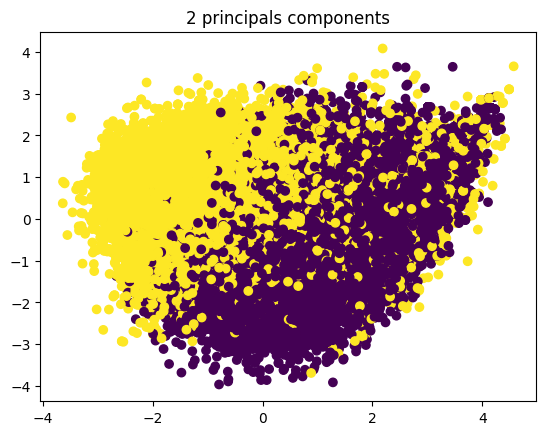

In [ ]:
plt.scatter(df_pca['C1'], df_pca['C2'], c=df_pca['label'])
plt.title("2 principals components")
plt.show()

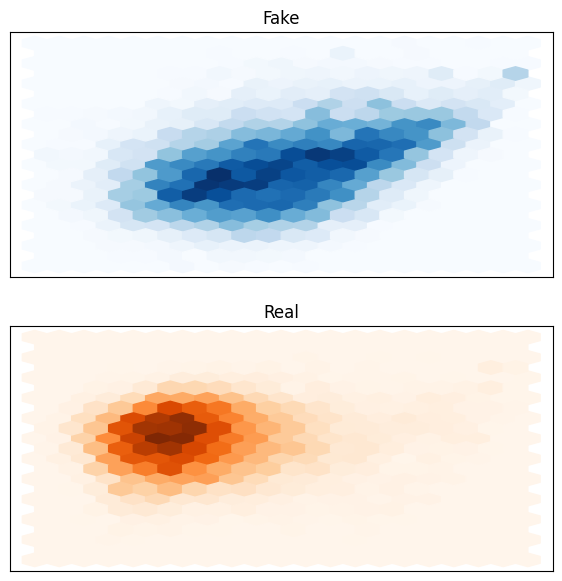

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(7,7))
cmaps = ["Blues", "Oranges"]
labels = [0, 1]
for label, cmap in zip(labels, cmaps):
  df_sub = df_pca.query(f"label == {label}")
  axes[label].hexbin(df_sub["C1"], df_sub["C2"], cmap=cmap, gridsize=20)
  title = "Fake" if label == 0 else "Real"
  axes[label].set_title(title)
  axes[label].set_xticks([])
  axes[label].set_yticks([])
plt.show()

In [19]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels).to(device)

2023-08-16 16:28:02.701962: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
dataset_encoded

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask'],
        num_rows: 26784
    })
    test: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask'],
        num_rows: 8371
    })
    validation: Dataset({
        features: ['tweet', 'label', 'input_ids', 'attention_mask'],
        num_rows: 6696
    })
})

# **TRAINING**

In [21]:
from transformers import TrainingArguments, Trainer

In [31]:
pip install accelerate -U

In [22]:
batch_size = 128
logging_steps = len(dataset_encoded["train"]) // batch_size
output_dir = f"{model_name}-finetuned-foot"

In [23]:
training_args = TrainingArguments(output_dir = output_dir,
                                  num_train_epochs = 3,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [24]:
trainer = Trainer(model=model, args=training_args, compute_metrics = compute_metrics, train_dataset=dataset_encoded["train"], eval_dataset=dataset_encoded["validation"], tokenizer=tokenizer)

In [25]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.176300,0.104133,0.958781,0.961138
2,0.080300,0.100877,0.961171,0.963778
3,0.053700,0.097760,0.964755,0.966695


TrainOutput(global_step=630, training_loss=0.1032611108015454, metrics={'train_runtime': 1091.4037, 'train_samples_per_second': 73.623, 'train_steps_per_second': 0.577, 'total_flos': 3201521765992704.0, 'train_loss': 0.1032611108015454, 'epoch': 3.0})

In [27]:
trainer.save_model()

In [28]:
preds_output = trainer.predict(dataset_encoded["validation"])

In [30]:
preds_output.metrics

{'test_loss': 0.09775960445404053,
 'test_accuracy': 0.9647550776583035,
 'test_f1': 0.9666948913350268,
 'test_runtime': 26.3183,
 'test_samples_per_second': 254.424,
 'test_steps_per_second': 2.014}

In [32]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [44]:
import matplotlib.pyplot as plt


In [49]:
def plot_confusion_matrix(y_true, y_preds):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap="Blues")
  plt.show()

In [36]:
preds_output

PredictionOutput(predictions=array([[-3.3056364,  3.2892506],
       [-3.399384 ,  3.2121534],
       [-3.412712 ,  3.3636472],
       ...,
       [-3.2808008,  3.1916733],
       [ 3.3220806, -3.677123 ],
       [ 3.211973 , -3.5061471]], dtype=float32), label_ids=array([1, 1, 1, ..., 1, 0, 0]), metrics={'test_loss': 0.09775960445404053, 'test_accuracy': 0.9647550776583035, 'test_f1': 0.9666948913350268, 'test_runtime': 26.3183, 'test_samples_per_second': 254.424, 'test_steps_per_second': 2.014})

# **ERROR ANALYSIS**

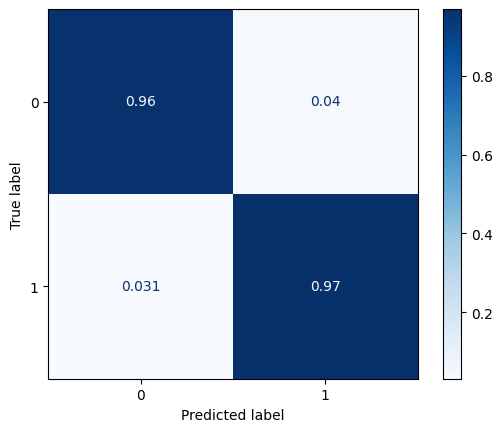

In [50]:
plot_confusion_matrix(preds_output.label_ids, np.argmax(preds_output.predictions, axis=1))

In [53]:
from torch.nn.functional import cross_entropy

In [78]:
def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                         reduction="none")
  return {
      "loss" : loss.cpu().numpy(),
      "predicted_label" : pred_label.cpu().numpy()
  }

In [76]:
dataset_encoded.set_format("torch",
                           columns=["input_ids", "attention_mask", "label"])

In [ ]:
dataset_encoded["validation"] = dataset_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

In [79]:
dataset_encoded.set_format("pandas")

In [90]:
df_val =dataset_encoded["validation"][:][["tweet", "label", "predicted_label","loss"]]

In [91]:
def num2str(lab):
  return "fake" if lab == 0 else "true"

In [92]:
df_val["label"] = df_val["label"].apply(num2str)
df_val["predicted_label"] = df_val["predicted_label"].apply(num2str)
df_val.head()

,tweet,label,predicted_label,loss
0,minutes have passed since the ghazl el mahall...,true,true,0.001366
1,fathallah zidane reveals the latest developmen...,true,true,0.001344
2,"al hani suleiman, the goalkeeper of the smouha...",true,true,0.001140
3,"minutes, we watch football, haha",fake,fake,0.000865
4,the egyptian club began its preparations for t...,true,true,0.001027


In [100]:
df_val.sort_values(by="loss", ascending=False, inplace=True)
df_val.head()

,tweet,label,predicted_label,loss
4585,"the difference between barcelona, atletico mad...",true,fake,6.334812
1918,news of the olympic committee's move to implem...,fake,true,6.033560
2034,the match between egypt and bahrain in the han...,fake,true,5.843777
6023,"the al hilal and al ahly match, which ended wi...",fake,true,5.755337
4303,"channel hebrew ... a businessman, s.r. lee, of...",fake,true,5.730887


In [94]:
df_val.iloc[0,0]

'the difference between barcelona, atletico madrid and man city meeting with chelsea, frankly, the english premier league is in another place, pure and from you to god, aguero'

In [95]:
df_val.iloc[1,0]

"news of the olympic committee's move to implement the ruling issued to nullify gamal abdel hamid's membership in the zamalek board of directors..within hours or days"

In [96]:
df_val.iloc[2,0]

"the match between egypt and bahrain in the handball world cup has been rescheduled.. to pm on saturday..come back to al ahly and zamalek at o'clock"

In [101]:
test_metrics = trainer.predict(dataset_encoded["test"])

In [104]:
test_metrics

PredictionOutput(predictions=array([[-3.3810778,  3.2990737],
       [ 1.4226679, -1.74542  ],
       [-2.400034 ,  2.3766508],
       ...,
       [-3.2464128,  3.241525 ],
       [ 3.3706155, -3.6946168],
       [ 2.6881247, -2.9934928]], dtype=float32), label_ids=array([1, 0, 1, ..., 1, 0, 0]), metrics={'test_loss': 0.09029018878936768, 'test_accuracy': 0.9691793095209652, 'test_f1': 0.9711215580926796, 'test_runtime': 30.043, 'test_samples_per_second': 278.634, 'test_steps_per_second': 2.197})

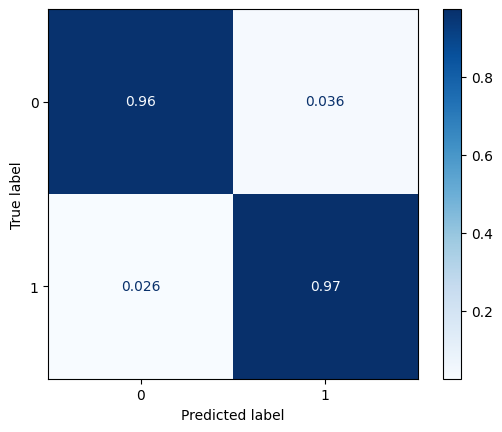

In [106]:
plot_confusion_matrix(test_metrics.label_ids, np.argmax(test_metrics.predictions, axis=1))

In [107]:
test_metrics.metrics

{'test_loss': 0.09029018878936768,
 'test_accuracy': 0.9691793095209652,
 'test_f1': 0.9711215580926796,
 'test_runtime': 30.043,
 'test_samples_per_second': 278.634,
 'test_steps_per_second': 2.197}

In [108]:
from transformers import pipeline

In [109]:
clf = pipeline("text-classification", model="/content/drive/MyDrive/Kaggle/fake_foot/distilbert-base-uncased-finetuned-foot")

In [112]:
preds = clf("Ronaldo is going to PSG, I swear, trust me !", return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [113]:
preds

[[{'label': 'LABEL_0', 'score': 0.9554290771484375},
  {'label': 'LABEL_1', 'score': 0.04457096755504608}]]

In [130]:
preds_df = pd.DataFrame(preds[0])
#preds_df["label"] = "Fake news" if preds_df["label"] == 0 else "Real News"
preds_df["label"][preds_df.label == 'LABEL_0'] = 0
preds_df["label"][preds_df.label == 'LABEL_1'] = 1
preds_df

/tmp/ipykernel_5325/2964821089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_df["label"][preds_df.label == 'LABEL_0'] = 0
/tmp/ipykernel_5325/2964821089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_df["label"][preds_df.label == 'LABEL_1'] = 1


,label,score
0,0,0.955429
1,1,0.044571


In [131]:
preds_df

,label,score
0,0,0.955429
1,1,0.044571


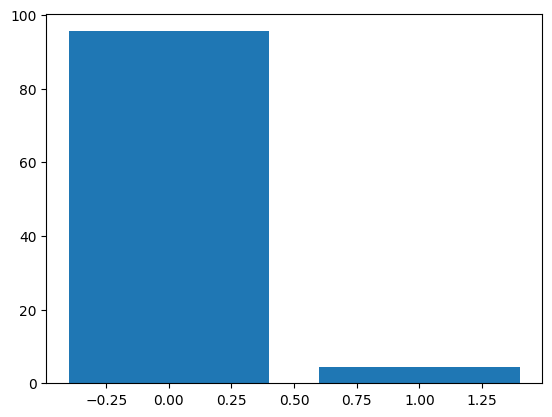

In [134]:
plt.bar(preds_df["label"], preds_df["score"]*100)
plt.show()